In [ ]:
# Import modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Clone of plot_confusion_matrix

def pretty_cm(y_test, y_preds, figsize=(10, 10), classes=None):
  from sklearn.metrics import confusion_matrix
  import itertools
  import numpy as np

  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_preds.round())
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel ="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set the treshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] > threshold else "black",
            size = 15)
    
#pretty_cm(y_test, y_preds)

In [ ]:
# Import the mnist data
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
tf.constant(train_data[1]), train_labels[1]

(<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  48, 238, 252, 252, 252

In [ ]:
train_data.shape

(60000, 28, 28)

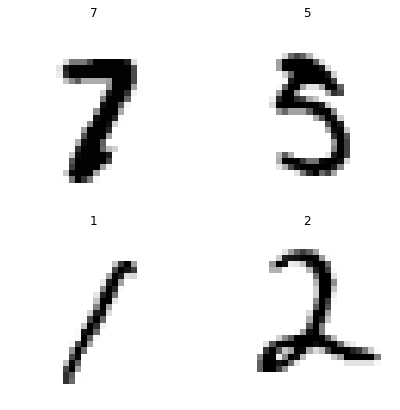

In [ ]:
# Plot multiple random images of MINST

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model
model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4993 - accuracy: 0.1116 - val_loss: 2.3002 - val_accuracy: 0.1141
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9974 - accuracy: 0.2120 - val_loss: 1.8641 - val_accuracy: 0.2274
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8180 - accuracy: 0.2547 - val_loss: 1.7795 - val_accuracy: 0.2815
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7443 - accuracy: 0.2898 - val_loss: 1.7206 - val_accuracy: 0.3321
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6711 - accuracy: 0.3214 - val_loss: 1.6282 - val_accuracy: 0.3636
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5402 - accuracy: 0.3768 - val_loss: 1.4486 - val_accuracy: 0.3778
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4155 - accuracy: 0.4141 - val_loss: 1.3671 - val_accuracy:

In [ ]:
# Normalize data
train_data_norm = train_data / 255.0
test_data_norm =  test_data / 255.0
train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
tf.random.set_seed(42)

# Create model
model_norm = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model
norm_history = model_norm.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1396 - accuracy: 0.9582 - val_loss: 0.0728 - val_accuracy: 0.9747
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0503 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.0492 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0473 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0542 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0478 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0543 -

In [ ]:
# Evaluate model vs model_norm
model.evaluate(test_data, test_labels), model_norm.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1335 - accuracy: 0.9673


([2.3077385425567627, 0.0966000035405159],
 [0.13351324200630188, 0.9672999978065491])

In [ ]:
model_norm.save("numeric_prediction.h5")

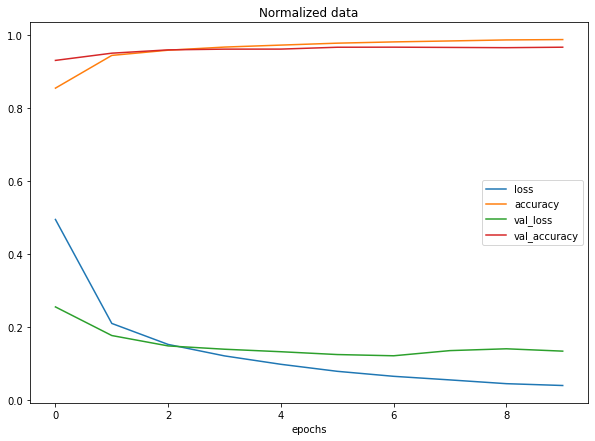

In [ ]:
# Plot loss cuvres
pd.DataFrame(norm_history.history).plot(title="Normalized data", figsize=(10,7), xlabel="epochs")

In [ ]:
y_probs = model_norm.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)

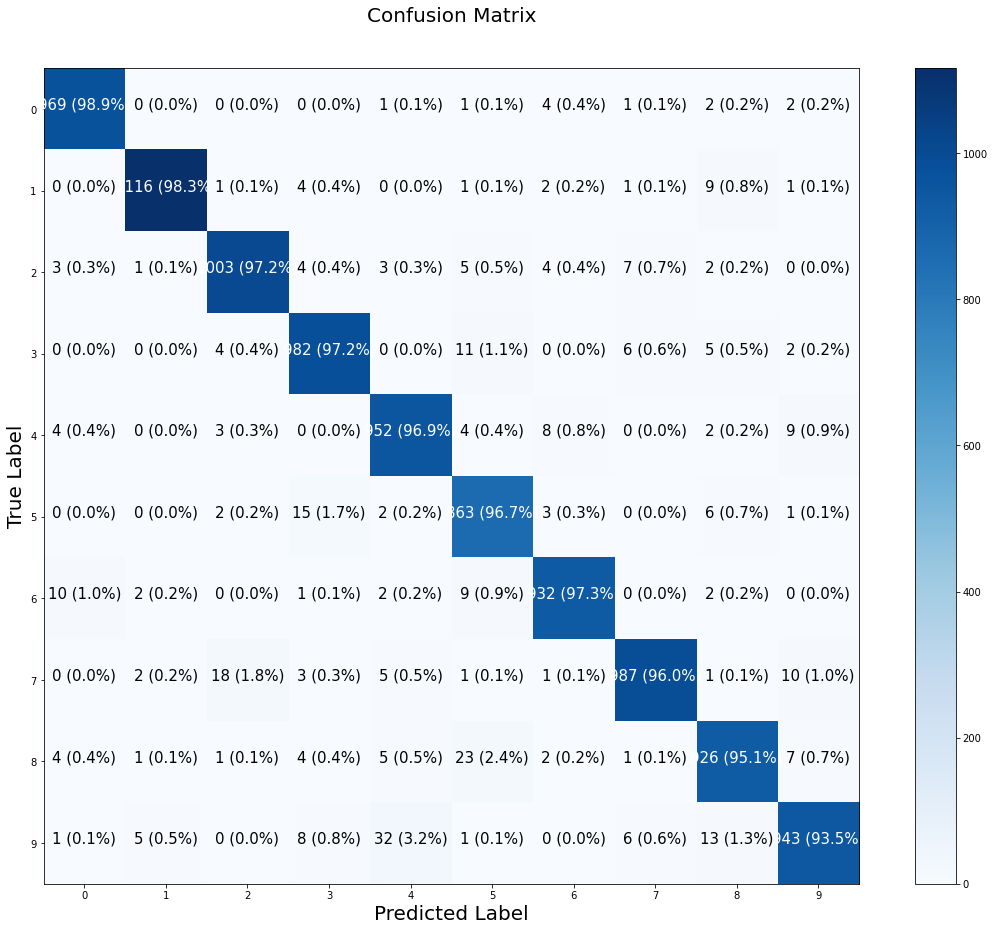

In [ ]:
pretty_cm(test_labels, y_preds, figsize=(20, 15))

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes=None):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = pred_probs.argmax()
  true_label = true_labels[i]

  # Plot image
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the title depending on if the prediciton is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediciton/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)


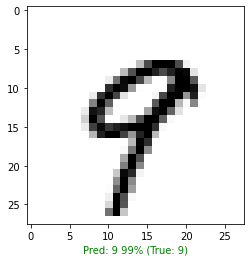

In [ ]:
plot_random_image(model_norm, test_data_norm, test_labels)